In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Sales_Data.xlsx')

In [4]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,2018-11-11,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,2018-11-18,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,2019-01-15,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,2019-04-05,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [6]:
df.shape

(2747, 20)

In [7]:
# no null values
# all data types are matching

In [8]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [9]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].unique())

['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']
['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']
['S10_1678' 'S10_1949' 'S10_2016' 'S10_4698' 'S10_4757' 'S10_4962'
 'S12_1099' 'S12_1108' 'S12_1666' 'S12_2823' 'S12_3148' 'S12_3380'
 'S12_3891' 'S12_3990' 'S12_4473' 'S12_4675' 'S18_1097' 'S18_1129'
 'S18_1342' 'S18_1367' 'S18_1589' 'S18_1662' 'S18_1749' 'S18_1889'
 'S18_1984' 'S18_2238' 'S18_2248' 'S18_2319' 'S18_2325' 'S18_2432'
 'S18_2581' 'S18_2625' 'S18_2795' 'S18_2870' 'S18_2949' 'S18_2957'
 'S18_3029' 'S18_3136' 'S18_3140' 'S18_3232' 'S18_3259' 'S18_3278'
 'S18_3320' 'S18_3482' 'S18_3685' 'S18_3782' 'S18_3856' 'S18_4027'
 'S18_4409' 'S18_4522' 'S18_4600' 'S18_4668' 'S18_4721' 'S18_4933'
 'S24_1046' 'S24_1444' 'S24_1578' 'S24_1628' 'S24_1785' 'S24_1937'
 'S24_2000' 'S24_2011' 'S24_2022' 'S24_2300' 'S24_2360' 'S24_2766'
 'S24_2840' 'S24_2841' 'S24_2887' 'S24_2972' 'S24_3151' 'S24_3191'
 'S24_3371' 'S24_3420' 'S24_3432' '

In [10]:
df.describe(include=['O']).T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


In [11]:
# Classic cars is the most sought after product line
# Euor shopping channel has purchased the most
# Madrid saw the maximum number of orders
# USA had the most number of transactions
# Majority of the deals were of medium size
# S18_3232 is the most purchased product

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [13]:
# Order quantity varies from 6 to 97 units and has an average of 35 units per order. 75% of the customers have ordered less than 43 units
# Price of each unit varies from 27 to 252 and average unit price being 102
# The average sales comes down to 3554 and it ranges from 483 to 14082.
# MSRP ranges from 33 to 214 and average value is 100

In [14]:
df.describe(include=['datetime']).T

,count,unique,top,freq,first,last
ORDERDATE,2747,246,2018-11-14,38,2018-01-06,2020-05-31


In [15]:
def UnivariateAnalysis(column,nbins):
    print('\033[1m'+ "Description of " + column + '\033[0m' + '\n' )
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

Description of ORDERNUMBER

count     2747.000000
mean     10259.761558
std         91.877521
min      10100.000000
25%      10181.000000
50%      10264.000000
75%      10334.500000
max      10425.000000
Name: ORDERNUMBER, dtype: float64
----------------------------------------------------------------------------
Distribution of ORDERNUMBER



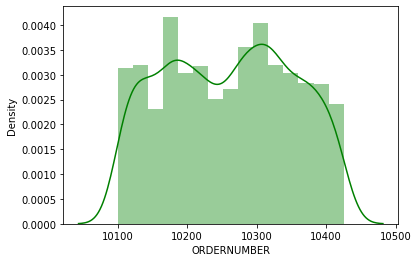

----------------------------------------------------------------------------
BoxPlot of ORDERNUMBER



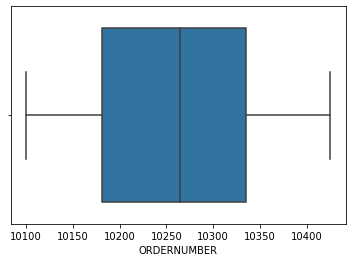

----------------------------------------------------------------------------
Description of QUANTITYORDERED

count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64
----------------------------------------------------------------------------
Distribution of QUANTITYORDERED



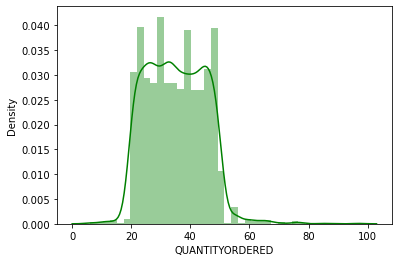

----------------------------------------------------------------------------
BoxPlot of QUANTITYORDERED



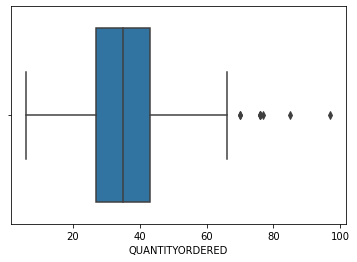

----------------------------------------------------------------------------
Description of PRICEEACH

count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64
----------------------------------------------------------------------------
Distribution of PRICEEACH



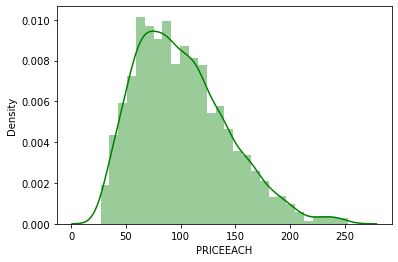

----------------------------------------------------------------------------
BoxPlot of PRICEEACH



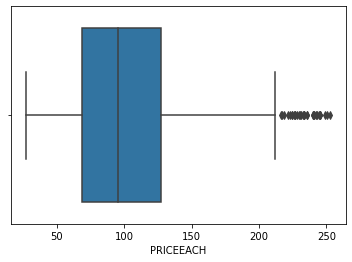

----------------------------------------------------------------------------
Description of ORDERLINENUMBER

count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64
----------------------------------------------------------------------------
Distribution of ORDERLINENUMBER



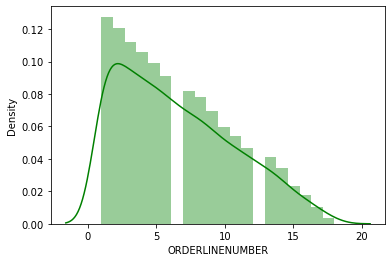

----------------------------------------------------------------------------
BoxPlot of ORDERLINENUMBER



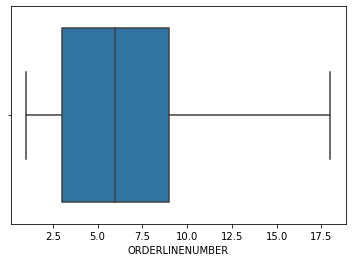

----------------------------------------------------------------------------
Description of SALES

count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64
----------------------------------------------------------------------------
Distribution of SALES



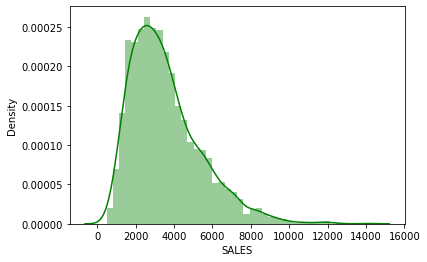

----------------------------------------------------------------------------
BoxPlot of SALES



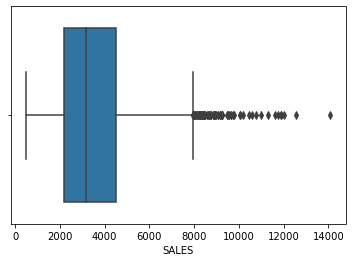

----------------------------------------------------------------------------
Description of DAYS_SINCE_LASTORDER

count    2747.000000
mean     1757.085912
std       819.280576
min        42.000000
25%      1077.000000
50%      1761.000000
75%      2436.500000
max      3562.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64
----------------------------------------------------------------------------
Distribution of DAYS_SINCE_LASTORDER



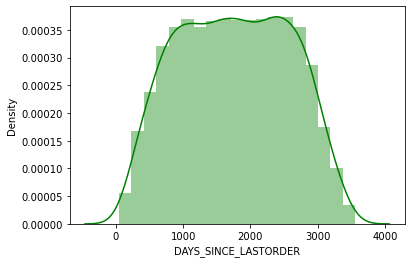

----------------------------------------------------------------------------
BoxPlot of DAYS_SINCE_LASTORDER



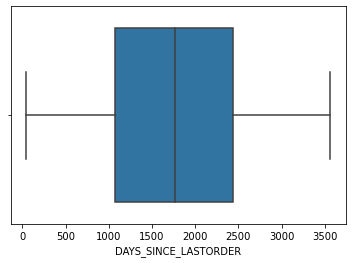

----------------------------------------------------------------------------
Description of MSRP

count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64
----------------------------------------------------------------------------
Distribution of MSRP



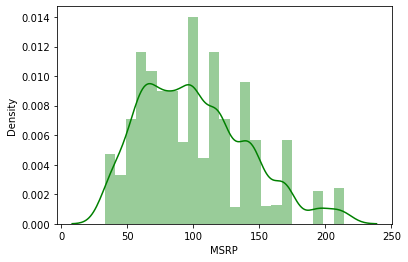

----------------------------------------------------------------------------
BoxPlot of MSRP



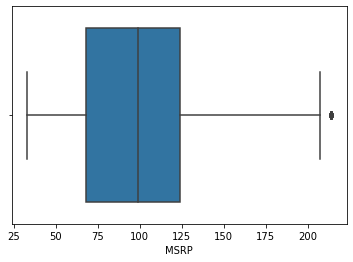

----------------------------------------------------------------------------


In [36]:
column_names = df.select_dtypes(exclude=['datetime','object']).columns.tolist()
for column in column_names:
    UnivariateAnalysis(column,20)

In [19]:
cat_columns = df.select_dtypes(include = 'object').columns.tolist()

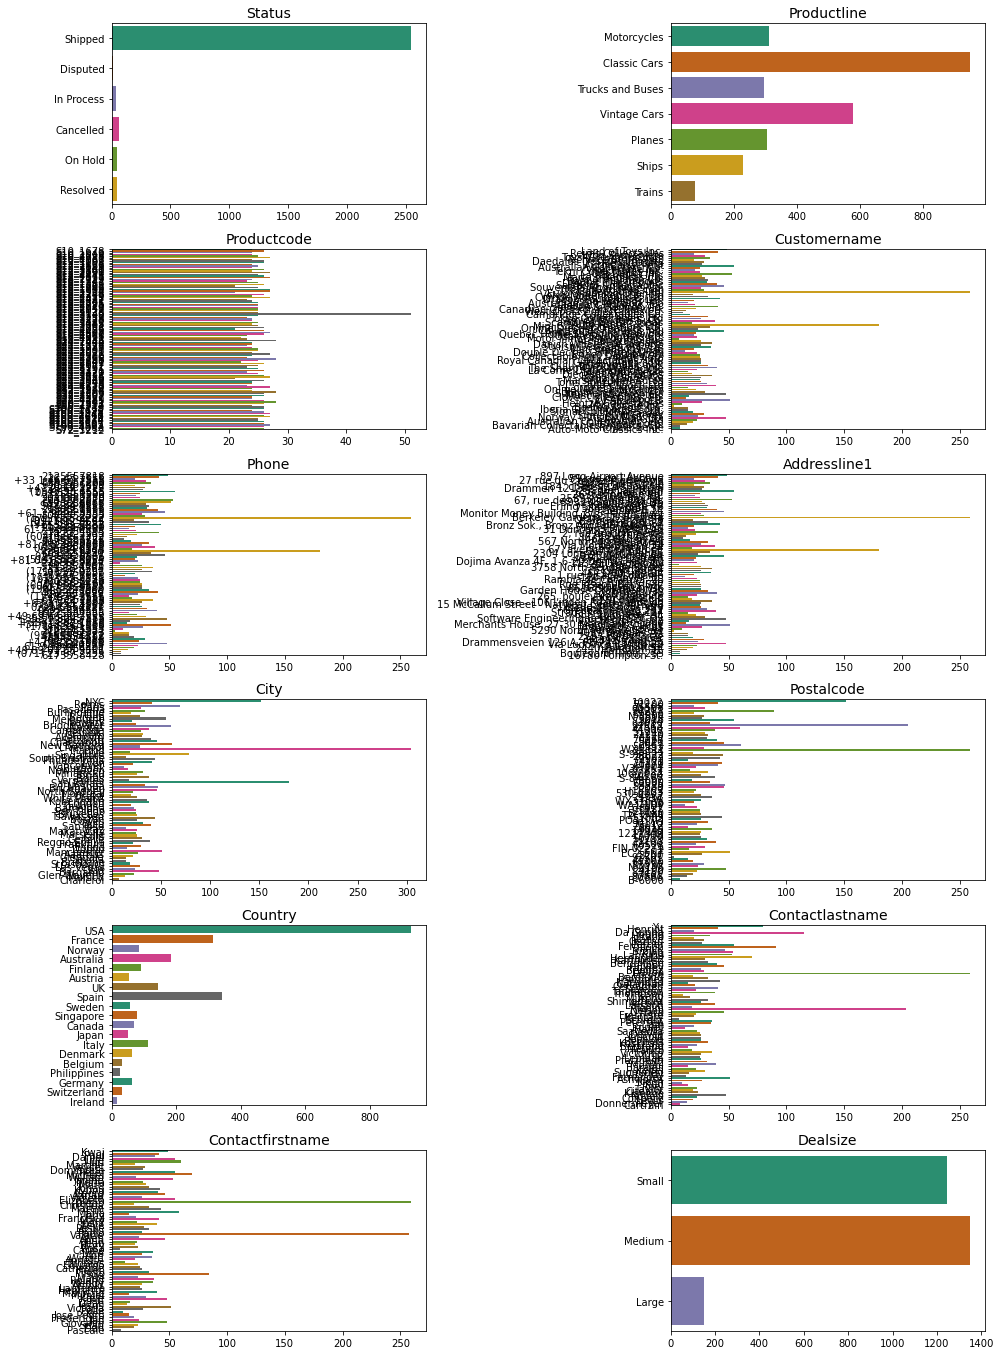

In [21]:
plt.figure(figsize=(14,50))
plotnumber = 1

for col in cat_columns:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

In [22]:
df['ORDERNUMBER'].value_counts()

10106    18
10165    18
10168    18
10316    18
10332    18
         ..
10158     1
10277     1
10286     1
10216     1
10294     1
Name: ORDERNUMBER, Length: 298, dtype: int64

<Figure size 864x576 with 0 Axes>

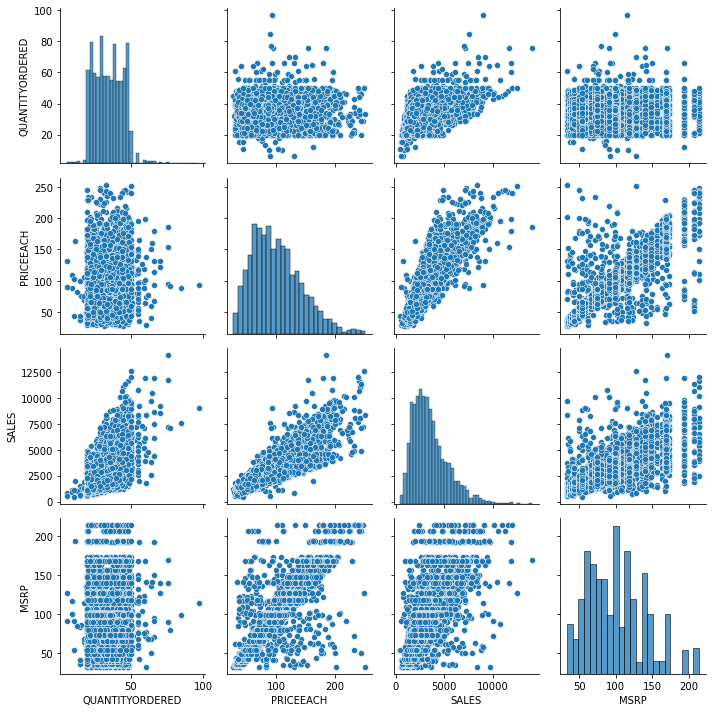

In [32]:
plt.figure(figsize=(12,8))
sns.pairplot(df.select_dtypes(exclude=['datetime','object']).drop(['ORDERNUMBER','ORDERLINENUMBER','DAYS_SINCE_LASTORDER'], axis=1))
plt.tight_layout()

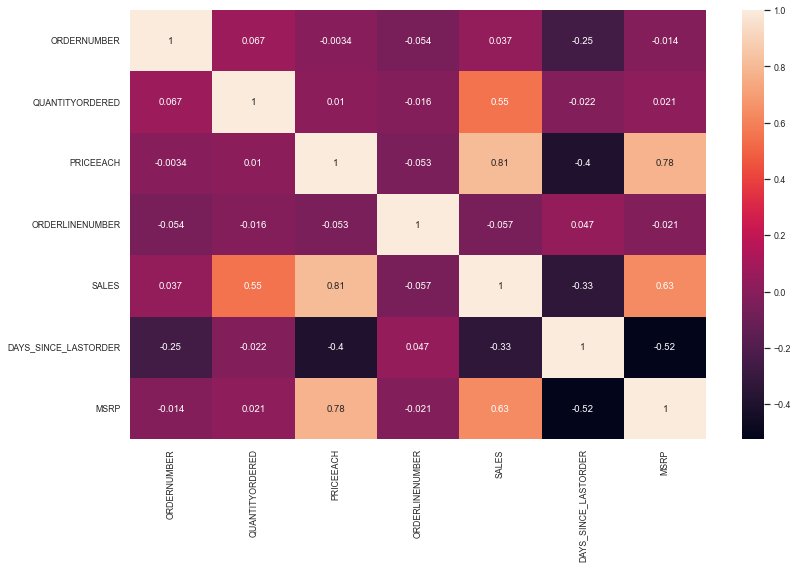

In [39]:
# constructing heatmap with only continuous variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

In [40]:
df['CUSTOMERNAME'].value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 89, dtype: int64

In [41]:
df['CUSTOMERNAME'].nunique()

89

In [42]:
df['ORDERDATE'].max()

Timestamp('2020-05-31 00:00:00')

In [44]:
df_result = pd.read_excel('Segmented_Sales_Data.xlsx')
df_result.head()

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,COUNTRY,DEALSIZE,Monetary,Recency,ORDERDATE [Binned],Monetary [Binned],Recency [Binned],Monetary_Segemented,Frequenct_Segmented,Recency_Segmented
0,"AV Stores, Co.",51.0,1778.0,91.084510,157807.81,51.0,51.0,Shipped,Vintage Cars,92.843137,...,UK,Medium,157807.81,196.0,Bin 4,Bin 4,Bin 3,Platinum,Platinum,Silver
1,Alpha Cognac,20.0,687.0,101.160000,70488.44,20.0,20.0,Shipped,Ships,97.150000,...,France,Medium,70488.44,64.0,Bin 1,Bin 1,Bin 1,Bronze,Bronze,Platinum
2,Amica Models & Co.,26.0,843.0,110.852692,94117.26,26.0,26.0,Shipped,Vintage Cars,107.653846,...,Italy,Small,94117.26,265.0,Bin 2,Bin 3,Bin 4,Gold,Silver,Bronze
3,"Anna's Decorations, Ltd",46.0,1469.0,106.424130,153996.13,46.0,46.0,Shipped,Classic Cars,104.717391,...,Australia,Small,153996.13,83.0,Bin 4,Bin 4,Bin 2,Platinum,Platinum,Gold
4,Atelier graphique,7.0,270.0,92.238571,24179.96,7.0,7.0,Shipped,Classic Cars,95.571429,...,France,Medium,24179.96,188.0,Bin 1,Bin 1,Bin 3,Bronze,Bronze,Silver


In [51]:
df_result.groupby(by=['Recency_Segmented','Frequenct_Segmented','Monetary_Segemented']).count()[['SALES']]

SALES
Recency_Segmented Frequenct_Segmented Monetary_Segemented       
Bronze            Bronze              Bronze                  12
                                      Silver                   2
                  Gold                Gold                     3
                  Platinum            Platinum                 1
                  Silver              Gold                     1
                                      Silver                   3
Gold              Bronze              Bronze                   6
                  Gold                Gold                     4
                                      Silver                   1
                  Platinum            Gold                     1
                                      Platinum                 6
                  Silver              Gold                     2
                                      Silver                   2
Platinum          Bronze              Bronze                   1
                                      Silver                   2
                  Gold                Gold                     3
                                      Platinum                 1
                  Platinum            Gold                     1
                                      Platinum                 9
                  Silver              Bronze                   1
                                      Gold                     1
                                      Silver                   4
Silver            Bronze              Bronze                   2
                                      Silver                   2
                  Gold                Gold                     2
                                      Platinum                 1
                  Platinum            Platinum                 4
                  Silver              Bronze                   1
                                      Gold                     4
                                      Silver                   6